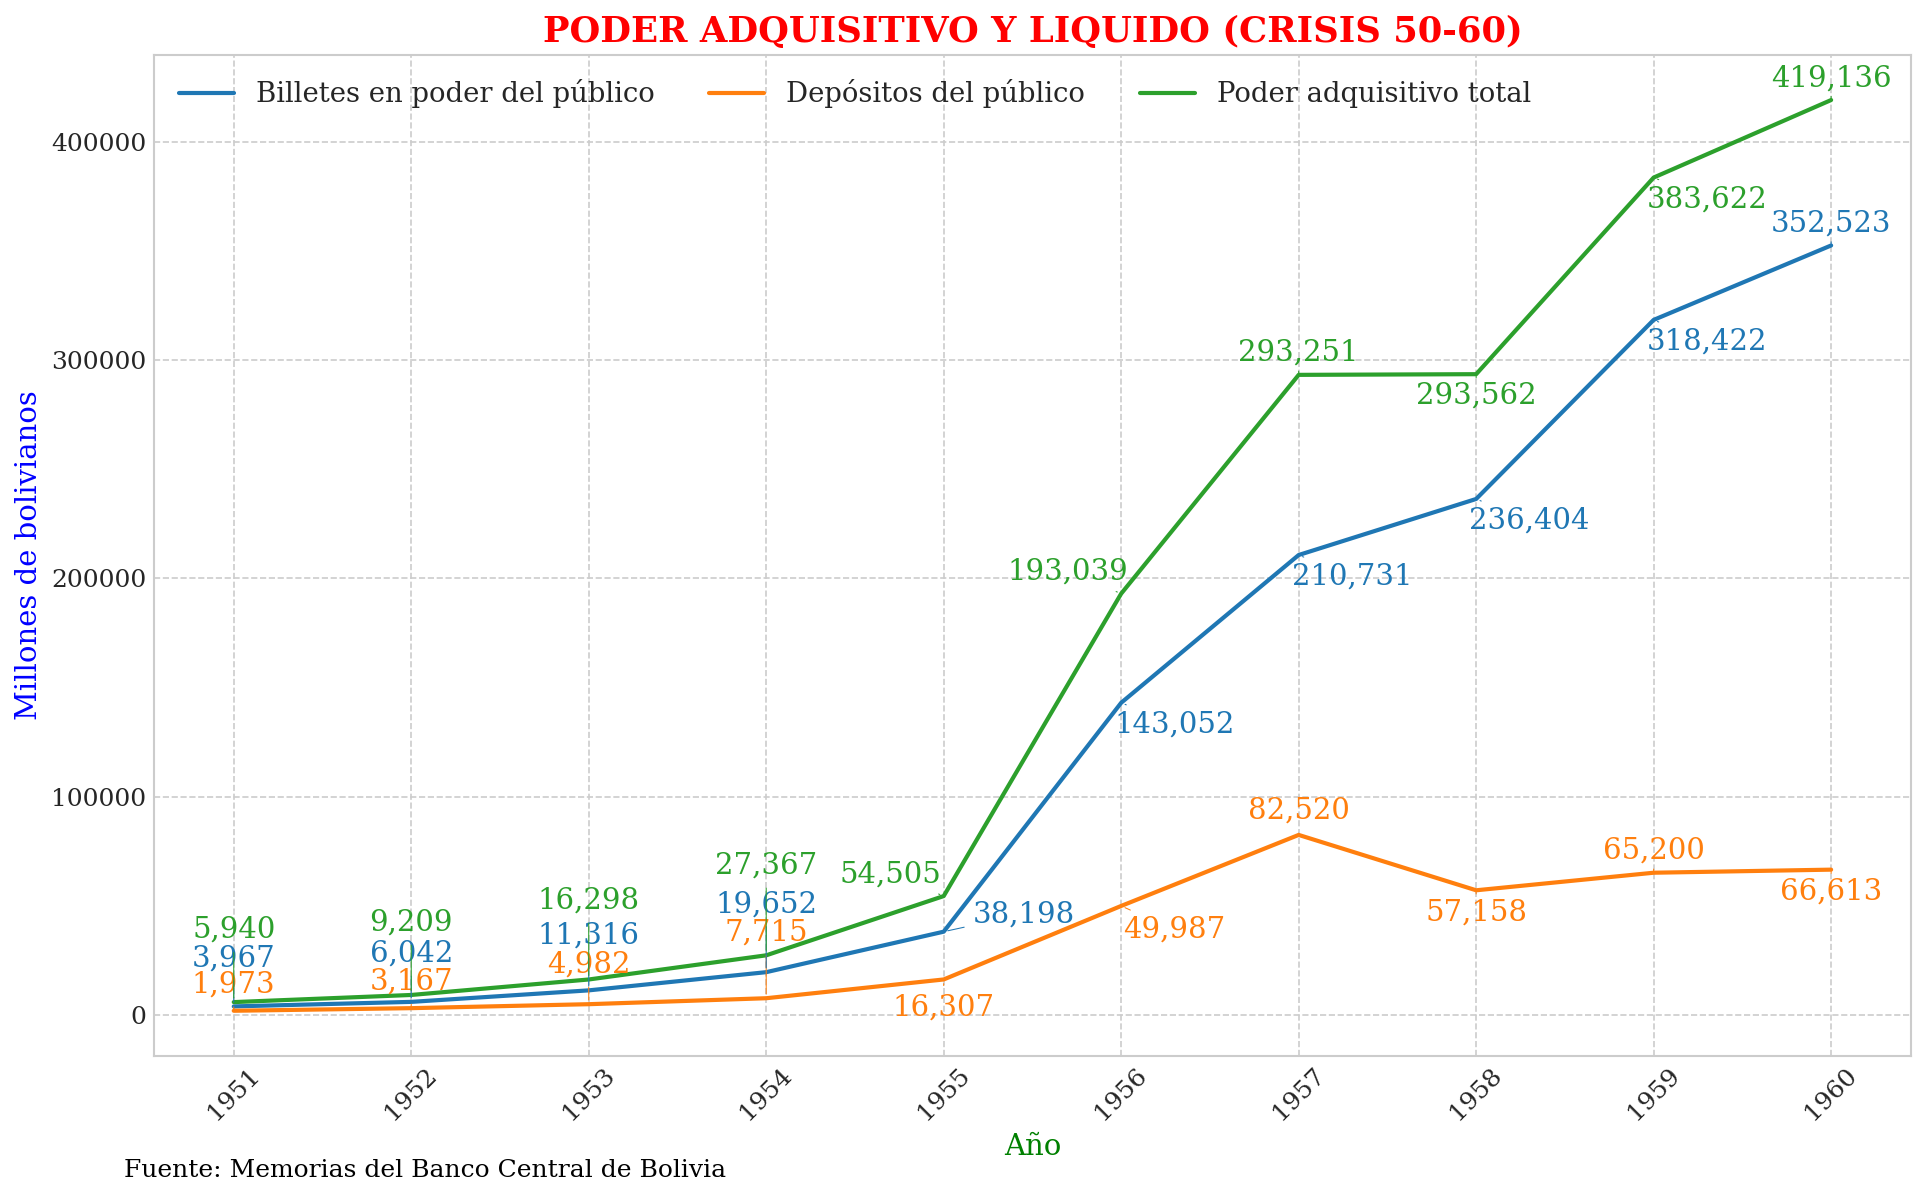

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "poder_adquisitivo"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      billetes_publico,
      depositos_publico,
      poder_adquisitivo
    FROM poder_adquisitivo_coste_vida
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [
    ("billetes_publico",  "Billetes en poder del público"),
    ("depositos_publico", "Depósitos del público"),
    ("poder_adquisitivo", "Poder adquisitivo total")
]
cols_componentes = [col for col, _ in componentes]
colors = {
    "billetes_publico":  "#1f77b4",
    "depositos_publico": "#ff7f0e",
    "poder_adquisitivo": "#2ca02c"
}

# offsets de anotaciones (dx, dy) — ajústalos según convenga
annotation_offsets = {
    "billetes_publico":  {
        1950: (0,  5),
        1951: (0,  22000),
        1952: (0,  22000),
        1953: (0,  25000),
        1954: (0,  31000),
        1955: (0.45,  8000),
        1956: (0.3,  -10000),
        1957: (0.3,  -10000),
        1958: (0.3,  -10000),  
        1959: (0.3,  -10000),
        1960: (0,  10000),
    },
    "depositos_publico": {
        1950: (0,  5),
        1951: (0,  12000),
        1952: (0,  12000),
        1953: (0,  18000),
        1954: (0,  30000),
        1955: (0,  -13003),
        1956: (0.3,  -11000),
        1957: (0,  11000),
        1958: (0,  -10000),  
        1959: (0,  10000),
        1960: (0,  -10000),
    },
    "poder_adquisitivo": {
        1950: (0,  10000),
        1951: (0,  33000),
        1952: (0,  33000),
        1953: (0,  36000),
        1954: (0,  41000),
        1955: (-0.3,  10000),
        1956: (-0.3,  10000),
        1957: (0,  10000),
        1958: (0,  -10000),  
        1959: (0.3,  -10000),
        1960: (0,  10000),
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty or len(sub) < 3:
        continue

    years_to_annot = list(sub.index)

    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"PODER ADQUISITIVO Y LIQUIDO ({nombre.upper()})",
        xlabel="Año",
        ylabel="Millones de bolivianos",
        source_text="Fuente: Memorias del Banco Central de Bolivia"
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5 
    )

    fig.savefig(output_dir / f"poder_adquisitivo_{nombre}.png")
    plt.show()
    plt.close(fig)
